
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [99]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-02 00:38:49--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-02 00:38:49--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.1’

Gender_bias


## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?  
2. ¿Cuál es el porcentaje de `biased` sobre el total?


In [100]:
!pip install textblob wordcloud nltk seaborn --quiet

In [101]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
tweets = pd.read_csv('Gender_bias_spanish.csv')

In [103]:
recuento = tweets['Label'].value_counts()
print(recuento)

Label
non-biased    1596
biased         318
Name: count, dtype: int64


<ipython-input-104-3bd438ebd930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=tweets,palette=['skyblue', 'salmon'])


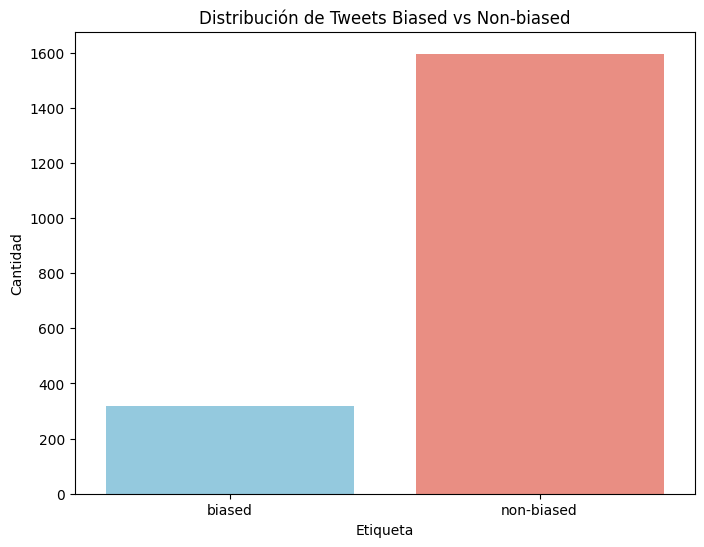

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=tweets,palette=['skyblue', 'salmon'])
plt.title('Distribución de Tweets Biased vs Non-biased')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.show()


## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?  

El cambio en la longitud media es: -41.71316614420062.
Esto significa que, en promedio, los tweets se hicieron 41.71 caracteres más cortos después de la limpieza.

2. ¿Cuántos tweets quedaron vacíos después de la limpieza?

La cantidad de tweets vacíos después de la limpieza es 0


In [105]:
def clean_text(text):
  # 1. Minúsculas
  text = text.lower()
  # 2. Quitar Tildes
  text = re.sub(r'[áéíóúü]', lambda m: {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'}.get(m.group(0), m.group(0)), text)
  # 3. Eliminar URLs, menciones y hashtags
  text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
  text = re.sub(r'@([a-zA-Z0-9_]+)', '', text)
  text = re.sub(r'#([a-zA-Z0-9_]+)', '', text)
  # 4. Quitar caracteres no alfabéticos
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # 5. Eliminar stopwords
  stop_words = stopwords.words('spanish')
  text = ' '.join([word for word in text.split() if word not in stop_words])
  # 6. Eliminar palanras con menos de 3caracteres
  text = ' '.join([word for word in text.split() if len(word) >= 3])
  return text

In [106]:
tweets['Clean'] = tweets['Contents'].apply(clean_text)

In [107]:
tweets['longitud_original'] = tweets["Contents"].astype(str).apply(len)
tweets['longitud_limpia'] = tweets["Clean"].astype(str).apply(len)
longitud_media_original = tweets['longitud_original'].mean()
longitud_media_limpio = tweets['longitud_limpia'].mean()

In [108]:
cambio_longitud = longitud_media_limpio - longitud_media_original
print(f"El cambio en la longitud media es: {cambio_longitud}")

El cambio en la longitud media es: -41.71316614420062


In [109]:
tweets_vacios = tweets[tweets['Clean'] == '']

In [110]:
cantidad_tweets_vacios = len(tweets_vacios)
print(f"La cantidad de tweets vacíos después de la limpieza es: {cantidad_tweets_vacios}")

La cantidad de tweets vacíos después de la limpieza es: 0



## 3. Palabras características por etiqueta

**Instrucciones**  
Para cada clase (`biased` y `non-biased`):

* Calcula las 10 palabras más frecuentes y grafícalas.
* Genera una nube de palabras (colormap `plasma` para `biased`, `viridis` para `non-biased`).

**Preguntas a responder**  
1. ¿Qué palabras son exclusivas o más frecuentes en `biased`?  
- mas, mujer, mujeres, asi, ser, solo, mama, quiero, mejor, tan
2. ¿Qué diferencias de tono observas entre ambas nubes?
- La nube de palabras "biased" refleja un tono más personal, emocional y potencialmente subjetivo, mientras que la nube de palabras "non-biased" presenta un tono más objetivo, neutral y, en general, más tranquilo. Esta diferencia se aprecia en la elección de palabras y los mapas de colores utilizados para visualizarlas.


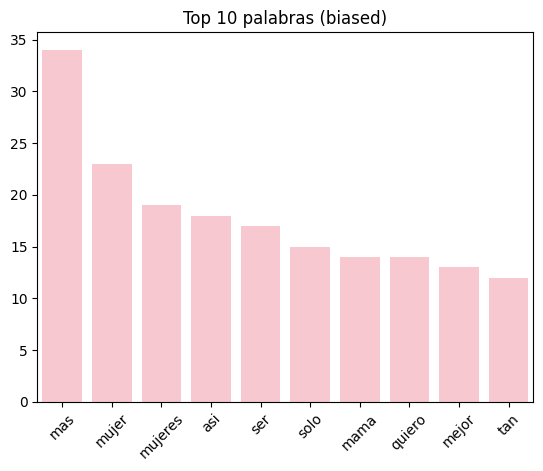

In [115]:
def palabras_mas_frecuentes(tweets_filtrado, clase):
    todas_palabras = ' '.join(tweets_filtrado['Clean']).split()
    conteo = Counter(todas_palabras)
    comunes = conteo.most_common(10)
    return conteo

conteo_result = palabras_mas_frecuentes(tweets[tweets['Label'] == 'biased'], 'biased')

top= conteo_result.most_common(10)
pal,freq=zip(*top)
sns.barplot(x=list(pal),y=list(freq), color= "pink")
plt.xticks(rotation=45)
plt.title('Top 10 palabras (biased)');plt.show()

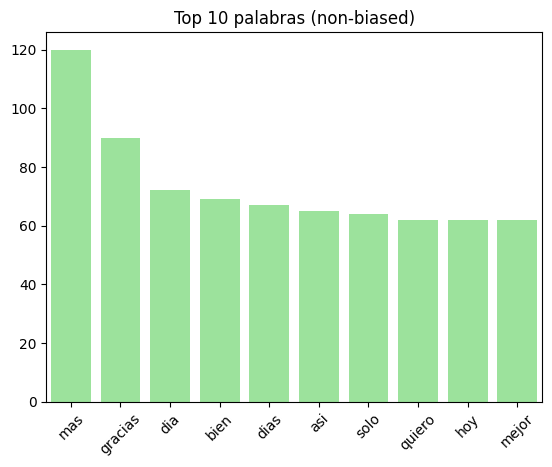

In [136]:
def palabras_mas_frecuentes(tweets_filtrado, clase):
    todas_palabras = ' '.join(tweets_filtrado['Clean']).split()
    conteo = Counter(todas_palabras)
    comunes = conteo.most_common(10)
    return conteo

conteo_result = palabras_mas_frecuentes(tweets[tweets['Label'] == 'non-biased'], 'non-biased')

top= conteo_result.most_common(10)
pal,freq=zip(*top)
sns.barplot(x=list(pal),y=list(freq), color= "lightgreen")
plt.xticks(rotation=45)
plt.title('Top 10 palabras (non-biased)');plt.show()

In [119]:
biased_tweets = tweets[tweets['Label'] == 'biased']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']

In [120]:
biased_text = ' '.join(biased_tweets['Clean'])
non_biased_text = ' '.join(non_biased_tweets['Clean'])

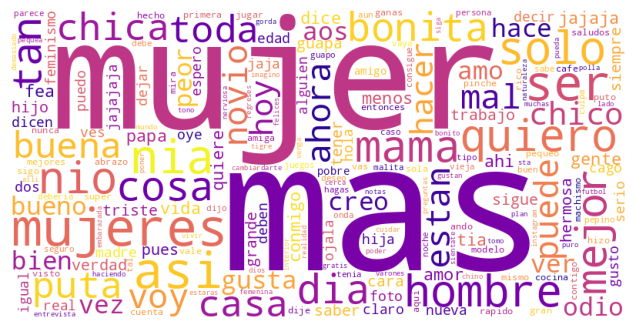

In [132]:
wc_biased=WordCloud(width=800,height=400,background_color='white', colormap= "plasma").generate(biased_text)
plt.figure(figsize=(10,4))
plt.imshow(wc_biased); plt.axis('off')
plt.show()

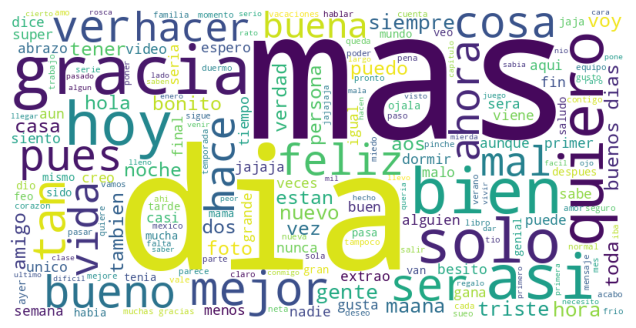

In [134]:
wc_non_biased = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(non_biased_text)
plt.figure(figsize=(10,4))
plt.imshow(wc_non_biased); plt.axis('off')
plt.show()


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  
- En los non-biased tweets la distribución se centra principalmente en un sentimiento ligeramente positivo, con un pico cercano a la polaridad de 0,1. Mientras que en los biased tweets la distribución es más dispersa y presenta una mayor frecuencia de tweets con puntuaciones de polaridad negativa en comparación con los otros. Esto muestra una gama más amplia de sentimientos expresados ​​en los biased tweets.
2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?
- Los tweets biased son, en promedio, neutrales ya que su promedio es 0.0


In [177]:
tweets['polarity'] = tweets['Clean'].apply(lambda text: TextBlob(text).sentiment.polarity)
tweets['polarity'].head()

,polarity
0,0.0
1,0.0
2,0.2
3,0.0
4,0.0


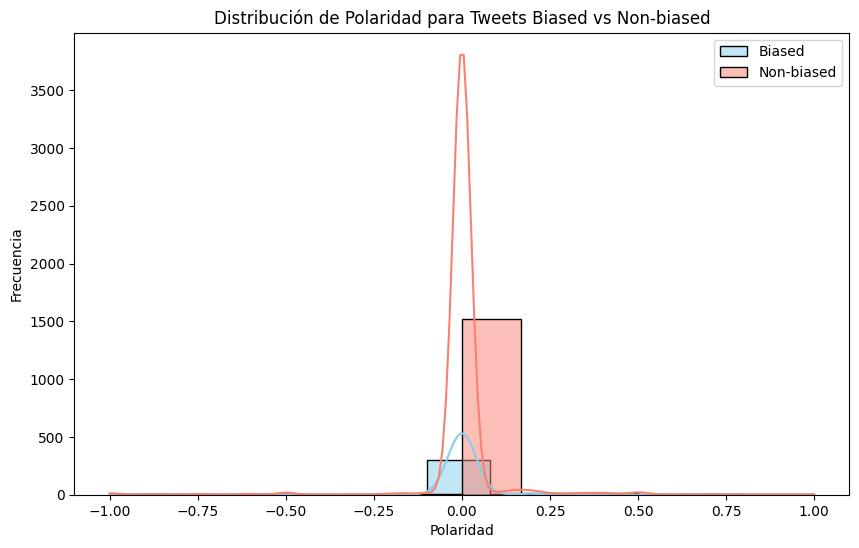

In [178]:
biased_tweets = tweets[tweets['Label'] == 'biased']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']

plt.figure(figsize=(10, 6))
sns.histplot(biased_tweets['polaridad'], color='skyblue', label='Biased', kde=True)
sns.histplot(non_biased_tweets['polaridad'], color='salmon', label='Non-biased', kde=True)

plt.title('Distribución de Polaridad para Tweets Biased vs Non-biased')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?  
- El hashtag #hablaconellas podría estar asociado a tweets biased, ya que sugiere una temática relacionada con género
2. ¿Qué usuarios son los más mencionados y en qué contexto?
- Los usuarios más mencionados son @blassauryn, @juarrallo, @youtube, @tenistachanel, y @celopanY, entre otros. Estos están relacionados con contenido de entretenimiento, opinión o influencers


In [157]:
def extraer_hashtags(texto):
  hashtags = re.findall(r"#(\w+)", texto)
  return hashtags

In [159]:
tweets['hashtags'] = tweets['Contents'].apply(extraer_hashtags)
todos_hashtags = [hashtag for sublista in tweets['hashtags'] for hashtag in sublista]
frecuencia_hashtags = pd.Series(todos_hashtags).value_counts().head(10)

In [161]:
def extraer_menciones(texto):
  menciones = re.findall(r"@(\w+)", texto)
  return menciones

In [162]:
tweets['menciones'] = tweets['Contents'].apply(extraer_menciones)
todas_menciones = [mencion for sublista in tweets['menciones'] for mencion in sublista]
frecuencia_menciones = pd.Series(todas_menciones).value_counts().head(10)

In [179]:
tweets

,Contents,Label,Clean,longitud_original,longitud_limpia,polarity,sentimiento,polaridad,hashtags,menciones
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron reciben noticias colchoncito puro ching...,111,66,0.0,0.0,0.0,[extrañoreirconchumel],[chumeltorres]
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable hacerme compra maana bajon ...,116,53,0.0,0.0,0.0,[],[]
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha rico nadamas falta presentacion,68,38,0.2,0.2,0.2,[],[jenniferduquee]
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito solo encuentro temporada...,115,53,0.0,0.0,0.0,[],[evagelcot]
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos,85,35,0.0,0.0,0.0,[playa],[]
...,...,...,...,...,...,...,...,...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased,iba dash cortadas color piel color langosta ho...,126,71,0.0,0.0,0.0,[],[]
1910,que pinche chiste tiene estar medio alto si to...,non-biased,pinche chiste medio alto aqui estan bien pigmeos,73,48,0.0,0.0,0.0,[],[]
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased,bien idiota comprado alienware quincena chaz c...,107,59,0.0,0.0,0.0,[],[]
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased,nota mental quieras ayudar alguien confia prim...,98,57,-0.1,-0.1,-0.1,[],[]


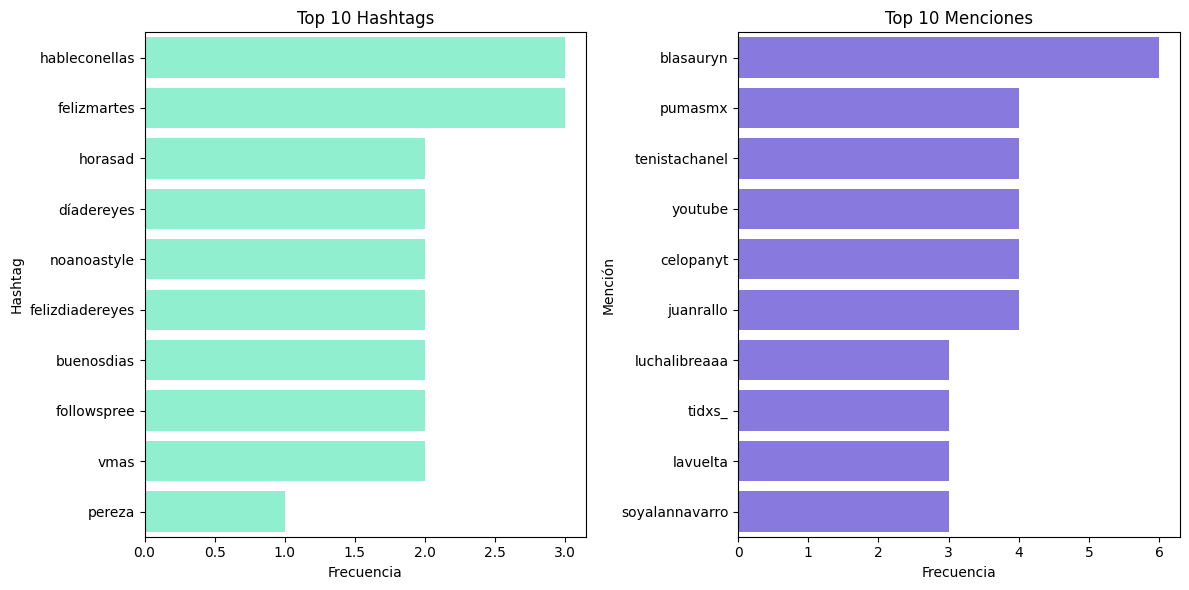

In [174]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=frecuencia_hashtags.values, y=frecuencia_hashtags.index, color='aquamarine')
plt.title('Top 10 Hashtags')
plt.xlabel('Frecuencia')
plt.ylabel('Hashtag')

plt.subplot(1, 2, 2)
sns.barplot(x=frecuencia_menciones.values, y=frecuencia_menciones.index, color='mediumslateblue')
plt.title('Top 10 Menciones')
plt.xlabel('Frecuencia')
plt.ylabel('Mención')

plt.tight_layout()
plt.show()


## 6. Conclusiones

Responde brevemente:

1. Dos insights sobre el **sesgo** lingüístico.  
- Palabras características: El análisis de frecuencia de palabras muestra que existen términos que se asocian más a tweets considerados como "biased", como "mujer", "mujeres", "mamá", "ser" y "solo", lo que podría indicar la presencia de un sesgo de género en el lenguaje utilizado.
- Temas recurrentes: Las nubes de palabras y los hashtags más frecuentes pueden revelar temas específicos relacionados con el sesgo en los tweets. Por ejemplo, la presencia destacada de hashtags como #machismo o #feminismo podría indicar que estos temas son centrales en la discusión sobre el sesgo en la muestra analizada.
2. Un insight sobre el **sentimiento**.  
- La distribución de la polaridad del sentimiento en los tweets etiquetados como "biased" tiende a ser ligeramente más negativa o neutra en comparación con los tweets "non-biased", lo cual sugiere que el lenguaje utilizado en los tweets con sesgo puede estar cargado de emociones negativas o expresar una falta de objetividad.
3. Una recomendación de comunicación para la marca.
- Con base en el análisis, la marca debería promover el uso de un lenguaje inclusivo en sus comunicaciones, evitando el uso de términos o expresiones que puedan perpetuar estereotipos de género o cualquier otro tipo de sesgo. Para ello, se recomienda una revisión exhaustiva de los mensajes y el material publicitario para asegurar una representación equitativa y respetuosa de todos los grupos.
